# Final QAC Analysis (first and second cycles)
by Deep Datta, Giri Ganta, Mihir Gathani, Patrick Kelleher, William Swain

## First Cycle: Intial QAC Analysis

### Question: Do Vessels Fish Around Shipwrecks More Often Than Not?

- The United States has a long history of shipwrecks from fishing vessels to actual tankers. Many vessels wreck each year and some are not listed down. The question is whether vessels fish around shipwrecks more often than not because of the theory that fish like the cover of obstructions and big objects from our knowledge of fresh water fishing because tend to stay around structures for safety.
  
- The US Office of Coast/ NOAA have a dataset at: https://nauticalcharts.noaa.gov/data/wrecks-and-obstructions.html which provides us with data regarding wrecks.
- We get some of our other data on fishing vessels from the Global Fishing Watch website: https://globalfishingwatch.org/
- We also get some of our data from the General Bathymetric Chart of the Oceans (GEBCO) for our depth values at: https://download.gebco.net/  

#
- Overview of our method:

    1. Get the data from the websites above.

    2. Merge and clean the datasets into one major method

    3. Next, visualize the data to see if there is a correlation between the shipwrecks and the fishing vessels. 

    4. Finally, check to see if the correlation answers are question above.

#
- Credit Listing:   

    1. Deep Datta - Worked on QAC and helped with the research questions.

    3. Giri Ganta - Worked on QAC and helped with plotting the data.

    4. Mihir Gathani - Worked on QAC and helped with data cleaning and formatting.

    5. Patrick Kelleher - Worked on the plotting and analysis of the data.

    6. William Swain - Worked on the plotted and analysis of the data.

Here, we import the required packages

In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

### Analysis 

Here, we perform data cleaning by removing the extra data, and bounding it to the box of 23.5N to 50N and 100W to 60W since that limits the data to the east coast of the US and Gulf of Mexico, which is where our interest lies. We also merge the cleaned fishing vessels data into a new data frame with the required columns.


In [51]:
curr_date = dt.strptime("2020-01-02", "%Y-%m-%d")
end_date = dt.strptime("2020-12-31", "%Y-%m-%d")
vessels_df = pd.read_csv(f'./mmsi-daily-csvs-10-v2-2020/{curr_date:%Y-%m-%d}.csv')
# Remove where fishing hours is 0 because that means the vessel wasn't fishing at that location
vessels_df = vessels_df[vessels_df.fishing_hours != 0]
# Only include vessels in the region between 23.5N and 50N and 100W and 60W
vessels_df = vessels_df[vessels_df.cell_ll_lat >= 23.5]
vessels_df = vessels_df[vessels_df.cell_ll_lat <= 50]
vessels_df = vessels_df[vessels_df.cell_ll_lon <= -60]
vessels_df = vessels_df[vessels_df.cell_ll_lon >= -100]
curr_date = curr_date + relativedelta(days=1)
while curr_date < end_date:
    temp_df = pd.read_csv(f'./mmsi-daily-csvs-10-v2-2020/{curr_date:%Y-%m-%d}.csv')
    # Remove where fishing hours is 0 because that means the vessel wasn't fishing at that location
    temp_df = temp_df[temp_df.fishing_hours != 0]
    # Only include vessels in the region between 23.5N and 50N and 100W and 60W
    temp_df = temp_df[temp_df.cell_ll_lat >= 23.5]
    temp_df = temp_df[temp_df.cell_ll_lat <= 50]
    temp_df = temp_df[temp_df.cell_ll_lon <= -60]
    temp_df = temp_df[temp_df.cell_ll_lon >= -100]
    vessels_df = pd.concat([vessels_df, temp_df])
    curr_date = curr_date + relativedelta(days=1)
    print(f'{curr_date:%Y-%m-%d}', end='\r')

display(vessels_df.info()) # display the type of information that vessels_df contains
vessels_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316224 entries, 6462 to 88002
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           316224 non-null  object 
 1   cell_ll_lat    316224 non-null  float64
 2   cell_ll_lon    316224 non-null  float64
 3   mmsi           316224 non-null  int64  
 4   hours          316224 non-null  float64
 5   fishing_hours  316224 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 16.9+ MB


None

date  cell_ll_lat  cell_ll_lon       mmsi    hours  fishing_hours
6462   2020-01-02         25.0        -82.5  367680570  14.1386        13.1827
6463   2020-01-02         25.0        -82.6  367680570   2.0897         2.0897
6899   2020-01-02         27.0        -83.0  367532970   1.7083         1.7083
6965   2020-01-02         28.0        -94.1  367743330   5.0741         4.8241
7040   2020-01-02         29.0        -89.9  366861460  13.6988        10.4994
...           ...          ...          ...        ...      ...            ...
87065  2020-12-30         31.8        -78.8  367719840   1.7255         0.2591
87659  2020-12-30         41.6        -68.6  368161410   0.2605         0.2605
87999  2020-12-30         43.6        -69.9  368016910   4.2641         2.1730
88000  2020-12-30         43.6        -69.2  368017040   7.3930         6.3683
88002  2020-12-30         43.6        -69.5  368092290   5.0569         0.3500

[316224 rows x 6 columns]

We then cleaned the AWOIS wrecks file to have the same bounding box as our vessels data.

In [52]:
wrecks_df = pd.read_excel("AWOIS_Wrecks.xlsx")
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]>23.5]
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]<50]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]<-60]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]>-100]

display(wrecks_df.info()) # display type of information that wrecks_df contains
wrecks_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5210 entries, 0 to 6221
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RECRD          5210 non-null   int64  
 1   VESSLTERMS     5210 non-null   object 
 2   FEATURE_TYPE   4955 non-null   object 
 3   LATDEC         5210 non-null   float64
 4   LONDEC         5210 non-null   float64
 5   GP_QUALITY     5166 non-null   object 
 6   DEPTH          4317 non-null   float64
 7   SOUNDING_TYPE  1575 non-null   object 
 8   YEARSUNK       173 non-null    float64
 9   HISTORY        5146 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 447.7+ KB


c:\Users\willi\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning:

Cannot parse header or footer so it will be ignored



None

RECRD    VESSLTERMS                                       FEATURE_TYPE  \
0     14620       UNKNOWN  Wreck - Submerged, dangerous to surface naviga...   
1     14292       UNKNOWN  Wreck - Submerged, dangerous to surface naviga...   
2     14296       ALGERIA  Wreck - Submerged, dangerous to surface naviga...   
3     14298       UNKNOWN  Wreck - Submerged, dangerous to surface naviga...   
4     14207       UNKNOWN  Wreck - Submerged, dangerous to surface naviga...   
...     ...           ...                                                ...   
6217   2886  NORHTEASTERN                                        Not Charted   
6218   2887        ARRAYO                                        Not Charted   
6219   2889        NORDAL                                        Not Charted   
6220  14917   USS VIRGINA                    Wreck - Submerged, nondangerous   
6221  14635       UNKNOWN  Wreck - Submerged, dangerous to surface naviga...   

         LATDEC     LONDEC GP_QUALITY  DEPTH    SOUNDING_TYPE  YEARSUNK  \
0     42.143528 -80.114556       High   18.0  Feet and tenths       NaN   
1     41.498284 -81.759593       High   26.0  Feet and tenths       NaN   
2     41.520448 -81.716076       High   32.0  Feet and tenths       NaN   
3     41.512713 -81.709879       High   22.0  Feet and tenths       NaN   
4     42.993389 -82.426583       High   34.0  Feet and tenths       NaN   
...         ...        ...        ...    ...              ...       ...   
6217  35.091842 -75.557928       Poor    0.0              NaN       NaN   
6218  34.983500 -76.051289       Poor    0.0              NaN       NaN   
6219  34.691842 -75.584597       Poor    0.0              NaN       NaN   
6220  35.019290 -75.285944        Med  103.0  Feet and tenths    1923.0   
6221  34.718417 -76.691278        Low    NaN              NaN       NaN   

                                                HISTORY  
0       F00542: S-W904-NRT4-07; Office review indica...  
1       H11689/2007-- S-w920-NRT4-07;  Dangerous sub...  
2       H11689/2007-- S-W920-NRT4-07;  A large subme...  
3       H11689/2007-- S-W920-NRT4-07;  A submerged w...  
4       CL 1883/1999--  The Canadian Hydrographic Se...  
...                                                 ...  
6217         SURVEY REQUIREMENTS_x000D_\nNOT DETERMINED  
6218         SURVEY REQUIREMENTS_x000D_\nNOT DETERMINED  
6219       _x000D_\nDESCRIPTION                     ...  
6220  American Battleship of WWI vintage sunk during...  
6221    Unknown source; Charted subm wreck appears s...  

[5210 rows x 10 columns]

For our ocean depth dataset, we made it so any terrain that had a positive value (i.e. above sea level) to have a value of 500. This is because the dataset included elevation above sea levels, so by making the elevation values the same and far enough away from 0, we get a much cleaner looking plot, visually. 

In [53]:
# This is the information given to us with the data
# ncols        9600
# nrows        6360
# xllcorner    -100.000000000000
# yllcorner    23.500000000000
# cellsize     0.004166666667
# NODATA_value -32767
cols = [-100 + i*0.004166666667 for i in range(9600)]
cols.insert(0, 'throwaway')
rows = [50 - i*0.004166666667 for i in range(6360)]
depth_df = pd.read_csv("./GEBCO_06_Nov_2022_e0f252343eb4/gebco_2022_n50.0_s23.5_w-100.0_e-60.0.asc", delimiter=" ", names=cols)
depth_df.index = rows
depth_df = depth_df.drop(columns="throwaway")
depth_df[depth_df > 0] = 500
depth_df

-100.000000  -99.995833   -99.991667   -99.987500   -99.983333   \
50.000000          500          500          500          500          500   
49.995833          500          500          500          500          500   
49.991667          500          500          500          500          500   
49.987500          500          500          500          500          500   
49.983333          500          500          500          500          500   
...                ...          ...          ...          ...          ...   
23.520833          500          500          500          500          500   
23.516667          500          500          500          500          500   
23.512500          500          500          500          500          500   
23.508333          500          500          500          500          500   
23.504167          500          500          500          500          500   

           -99.979167   -99.975000   -99.970833   -99.966667   -99.962500   \
50.000000          500          500          500          500          500   
49.995833          500          500          500          500          500   
49.991667          500          500          500          500          500   
49.987500          500          500          500          500          500   
49.983333          500          500          500          500          500   
...                ...          ...          ...          ...          ...   
23.520833          500          500          500          500          500   
23.516667          500          500          500          500          500   
23.512500          500          500          500          500          500   
23.508333          500          500          500          500          500   
23.504167          500          500          500          500          500   

           ...  -60.041667   -60.037500   -60.033333   -60.029167   \
50.000000  ...         -149         -147         -133         -133   
49.995833  ...         -146         -145         -135         -127   
49.991667  ...         -149         -144         -136         -130   
49.987500  ...         -147         -143         -137         -133   
49.983333  ...         -141         -141         -138         -134   
...        ...          ...          ...          ...          ...   
23.520833  ...        -5938        -5936        -5935        -5933   
23.516667  ...        -5938        -5937        -5935        -5934   
23.512500  ...        -5938        -5938        -5936        -5935   
23.508333  ...        -5939        -5939        -5938        -5937   
23.504167  ...        -5940        -5940        -5939        -5939   

           -60.025000   -60.020833   -60.016667   -60.012500   -60.008333   \
50.000000         -133         -137         -131         -131         -134   
49.995833         -127         -131         -131         -131         -132   
49.991667         -130         -129         -129         -129         -127   
49.987500         -133         -131         -127         -127         -125   
49.983333         -134         -131         -129         -129         -128   
...                ...          ...          ...          ...          ...   
23.520833        -5932        -5932        -5931        -5930        -5932   
23.516667        -5933        -5932        -5932        -5931        -5933   
23.512500        -5935        -5934        -5933        -5933        -5934   
23.508333        -5936        -5936        -5935        -5935        -5936   
23.504167        -5938        -5937        -5937        -5937        -5937   

           -60.004167   
50.000000         -135  
49.995833         -132  
49.991667         -126  
49.987500         -124  
49.983333         -128  
...                ...  
23.520833        -5934  
23.516667        -5934  
23.512500        -5936  
23.508333        -5937  
23.504167        -5939  

[6360 rows x 9600 columns]

With data gathering and cleaning completed, we overlay the fishing boat data and the shipwreck data to see if there is any correlation.

Text(0.5, 0, 'Longitude')

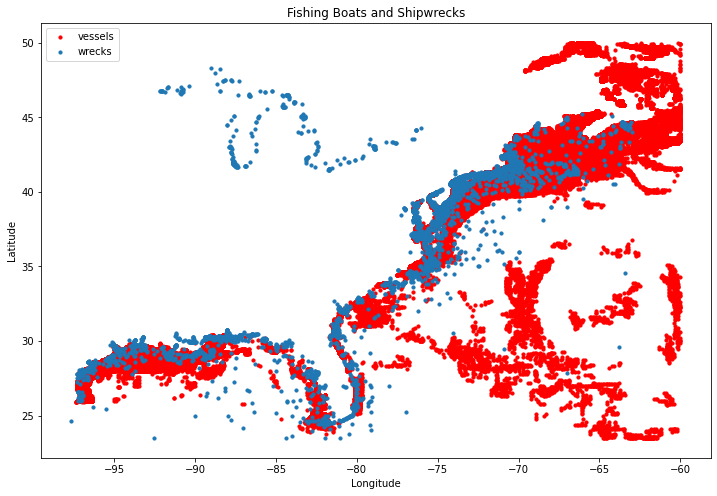

In [54]:
axes = vessels_df.plot.scatter(x='cell_ll_lon',y='cell_ll_lat',vmin=0,vmax=6,s=10,color="red",figsize=(12,8), alpha=1,sharex=False, label = "vessels")
axes= wrecks_df.plot.scatter(x='LONDEC',y='LATDEC',vmin=0,vmax=6,s=10,figsize=(12,8), alpha=1,sharex=False,ax=axes,title="Fishing Boats and Shipwrecks", label = "wrecks")
axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")

The data looks promising from a distance, with a heavy presence of shipwrecks and fishing boats lining the coast.

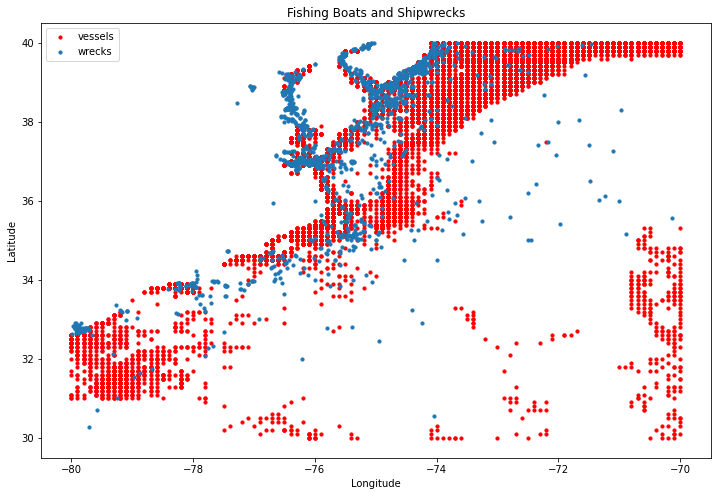

In [55]:
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]>30]
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]<40]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]<-70]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]>-80]

vessels_overlay = vessels_df.copy()
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat >= 30]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat <= 40]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon <= -70]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon >= -80]

axes = vessels_overlay.plot.scatter(x='cell_ll_lon',y='cell_ll_lat',vmin=0,vmax=6,s=10,color="red",figsize=(12,8), alpha=1,sharex=False, label = "vessels")
axes= wrecks_df.plot.scatter(x='LONDEC',y='LATDEC',vmin=0,vmax=6,s=10,figsize=(12,8), alpha=1,sharex=False,ax=axes,title="Fishing Boats and Shipwrecks", label = "wrecks")
axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")
axes.legend(loc = "upper left")

However, when taking a closer look the data shows that fishing boats appear to avoid areas with many shipwrecks. A possible reason for this is that shipwrecks are caused by hazardous waters and fishing boats steer clear of those areas.

This data shows that fishing boats do not tend to fish around shipwrecks.

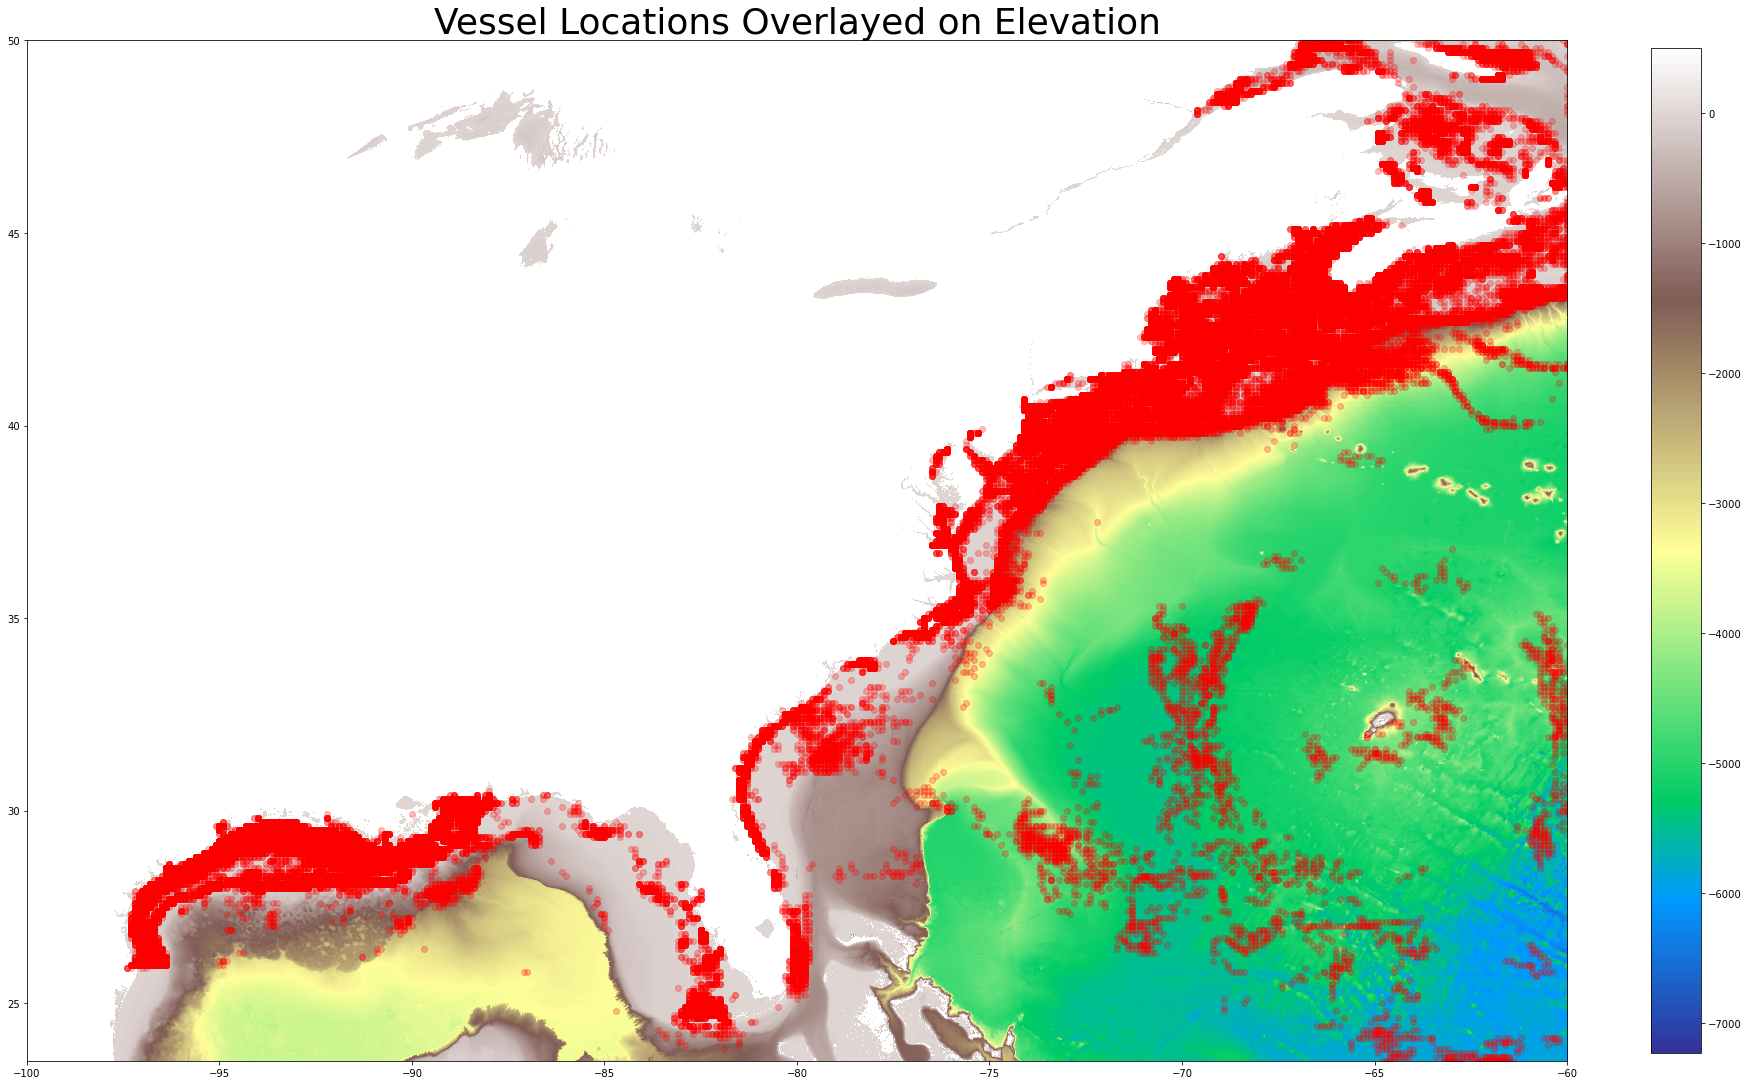

In [56]:
plt.figure(figsize=(30, 30))
plt.imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
plt.colorbar(fraction=0.03)
plt.scatter(vessels_df['cell_ll_lon'], vessels_df['cell_ll_lat'], vmin=0, vmax=6, color="red", alpha=0.25)
plt.title("Vessel Locations Overlayed on Elevation", fontsize=36)
plt.show()

During processing, we noticed that there were was an interesting pattern of fishing boats farther off the coast. This data seems to have some kind of connection with the seafloor elevation data. This interesting relationship prompts a new question, can fishing boat locations be used to predict bathymetric data?

### Conclusion 

- Thanks to our analysis we figured out that there is not enough of a correlation between fishing boat locations and shipwrecks. Possible reasons that fishing boats away from shore are not around shipwrecks could be that commercial boats do not want to drag nets over shipwrecks. Another reason could be that the ships that have sunk are in dangerous waters, which would deter fishing boats from that area. However, shipwrecks and fishing boats close to the shore were in close proximity to each other. This causes the relationship between shipwrecks and fishing boats to be inconclusive. Now we are exploring the connection between fishing boat locations and ocean floor elevations to see if there is a correlation there. From there we will revise as necessary based on the previous hypothesis unless more problems arise in our data.

- Caveats: Had to revise our data and find more data due to a lot of missing data in our original dataset. Also, we had to find a way to merge the datasets together because they were not in the same format.

- Future work: We are going to look at the connection between fishing boat locations and ocean floor elevations to see if there is a correlation there. We may also revise our question(s) in the future depending on the data that has been gathered due to the huge amount of data that is unavailable.

- Open Questions: How often do people fish around shipwrecks? What reasons do they fish around shipwrecks? How far back does this trend go? How far back does the data go in the US in terms of shipwrecks? 

## Second Cycle: Final QAC Analysis

### New Questions and Hypotheses:

#### Question 1: Is there a connection between depth and where vessels are located?

#### Question 2: Can depth be predicted by fishing hours?

#### Question 3: Can we distinguish between good and bad fishing locations based on depth?

#### Question 4: Does the time of year affect where most fishing vessels are?

- Overview of our method:

  1. Cleaned the depth data to have a value of 500 for any terrain above sea level.
   
  2. Filtered the depth data to frame the data to the bounding box of 23.5N to 36.5N and 74.5W to 61W which gets us a better look at the area around Bermuda.


  3. Pulled depth data from the GEBCO dataset and merged it with the fishing vessels dataset.


  4. Check average and total depth for fishing hours. 


  5. Finally check for a correlation between fishing hours and vessel depth.


  6. Investigate how time of year affects fishing hours, locations, depths through interactive visualizations.

#
- Credit Listing:   

    1. Deep Datta - Worked on the question and conclusion of the second cycle QAC and planning of how we would hypothesize questions, etc. including anything from the first cycle that we would need to change.


    2. Giri Ganta - QAC analysis work for the second cycle including revisions and any previous work from the first QAC cycle that we would need to change.

    3. Mihir Gathani - Worked on interactive visualizations, QAC and overall formatting for the whole notebook including forming some conclusions for the questions we had including any work from the previous 1st QAC cycle that we would need to change.

    4. Patrick Kelleher - Worked on the vessel and depth plot data and overlays including mentioned work from the first cycle of the QACs that we would need to change.

    5. William Swain -  Did visualizations, analysis, and data processing for the Bermuda area for the second QAC cycle including work from the previous 1st QAC cycle that we would need to change.


### Analysis

- We are looking at the Bermuda area due to the unique fishing boat pattern and its distance away from shore. We are looking at an area away from shore because the connection between shallow water and fishing boat location is already well known and trivial.
- We filter the depth data to only include the Bermuda area.

In [57]:
df = pd.DataFrame(depth_df)
df = df.iloc[lambda x:x.index<37]
df = df.iloc[:,[column>-75 for column in df.columns]]
df

-75.000000  -74.995833  -74.991667  -74.987500  -74.983333  \
37.000000         -43         -46         -41         -41         -41   
36.995833         -46         -66         -42         -42         -42   
36.991667         -44        -132         -42         -42         -41   
36.987500        -162        -124         -41         -41         -40   
36.983333         -94         -75         -39         -39         -39   
...               ...         ...         ...         ...         ...   
23.520833       -2120       -2217       -2287       -2362       -2448   
23.516667       -1932       -2036       -2134       -2233       -2334   
23.512500       -1742       -1854       -1974       -2091       -2204   
23.508333       -1583       -1695       -1827       -1955       -2071   
23.504167       -1469       -1569       -1708       -1839       -1954   

           -74.979167  -74.975000  -74.970833  -74.966667  -74.962500  ...  \
37.000000         -41         -41         -41         -43         -43  ...   
36.995833         -41         -41         -41         -42         -42  ...   
36.991667         -40         -40         -41         -42         -43  ...   
36.987500         -40         -40         -37         -37         -44  ...   
36.983333         -39         -42         -39         -39         -41  ...   
...               ...         ...         ...         ...         ...  ...   
23.520833       -2541       -2626       -2628       -2621       -2620  ...   
23.516667       -2434       -2516       -2542       -2550       -2555  ...   
23.512500       -2307       -2394       -2433       -2456       -2474  ...   
23.508333       -2172       -2254       -2311       -2352       -2383  ...   
23.504167       -2049       -2126       -2195       -2249       -2292  ...   

           -60.041667  -60.037500  -60.033333  -60.029167  -60.025000  \
37.000000       -5212       -5217       -5213       -5206       -5203   
36.995833       -5206       -5209       -5208       -5202       -5196   
36.991667       -5195       -5195       -5190       -5185       -5186   
36.987500       -5187       -5187       -5185       -5181       -5178   
36.983333       -5181       -5181       -5179       -5176       -5173   
...               ...         ...         ...         ...         ...   
23.520833       -5938       -5936       -5935       -5933       -5932   
23.516667       -5938       -5937       -5935       -5934       -5933   
23.512500       -5938       -5938       -5936       -5935       -5935   
23.508333       -5939       -5939       -5938       -5937       -5936   
23.504167       -5940       -5940       -5939       -5939       -5938   

           -60.020833  -60.016667  -60.012500  -60.008333  -60.004167  
37.000000       -5201       -5199       -5192       -5185       -5181  
36.995833       -5192       -5188       -5182       -5176       -5175  
36.991667       -5184       -5179       -5173       -5171       -5174  
36.987500       -5173       -5168       -5165       -5165       -5169  
36.983333       -5169       -5161       -5158       -5160       -5165  
...               ...         ...         ...         ...         ...  
23.520833       -5932       -5931       -5930       -5932       -5934  
23.516667       -5932       -5932       -5931       -5933       -5934  
23.512500       -5934       -5933       -5933       -5934       -5936  
23.508333       -5936       -5935       -5935       -5936       -5937  
23.504167       -5937       -5937       -5937       -5937       -5939  

[3240 rows x 3600 columns]

- Now to filter the vessel data to only allow for vessels in the Bermuda area.

date  cell_ll_lat  cell_ll_lon       mmsi    hours  \
6770    2020-01-14         32.0        -63.7  310996688   0.1161   
6771    2020-01-14         32.0        -63.6  310996688   1.1913   
77288   2020-01-14         31.9        -63.9  310996688   1.6919   
77289   2020-01-14         31.9        -63.6  310996688  12.3572   
77291   2020-01-14         31.9        -63.7  310996688   0.3600   
...            ...          ...          ...        ...      ...   
19772   2020-12-12         26.5        -71.7  367500860   8.7044   
19774   2020-12-12         26.5        -71.4  367500860   6.5902   
70505   2020-12-12         26.4        -71.7  367500860   5.0402   
85753   2020-12-12         35.8        -74.4  338140028   5.1080   
109919  2020-12-12         26.6        -71.5  367500860   1.7616   

        fishing_hours  
6770           0.1161  
6771           1.1913  
77288          1.6919  
77289         12.3572  
77291          0.3600  
...               ...  
19772          8.7044  
19774          6.5902  
70505          5.0402  
85753          5.1080  
109919         1.7616  

[2881 rows x 6 columns]

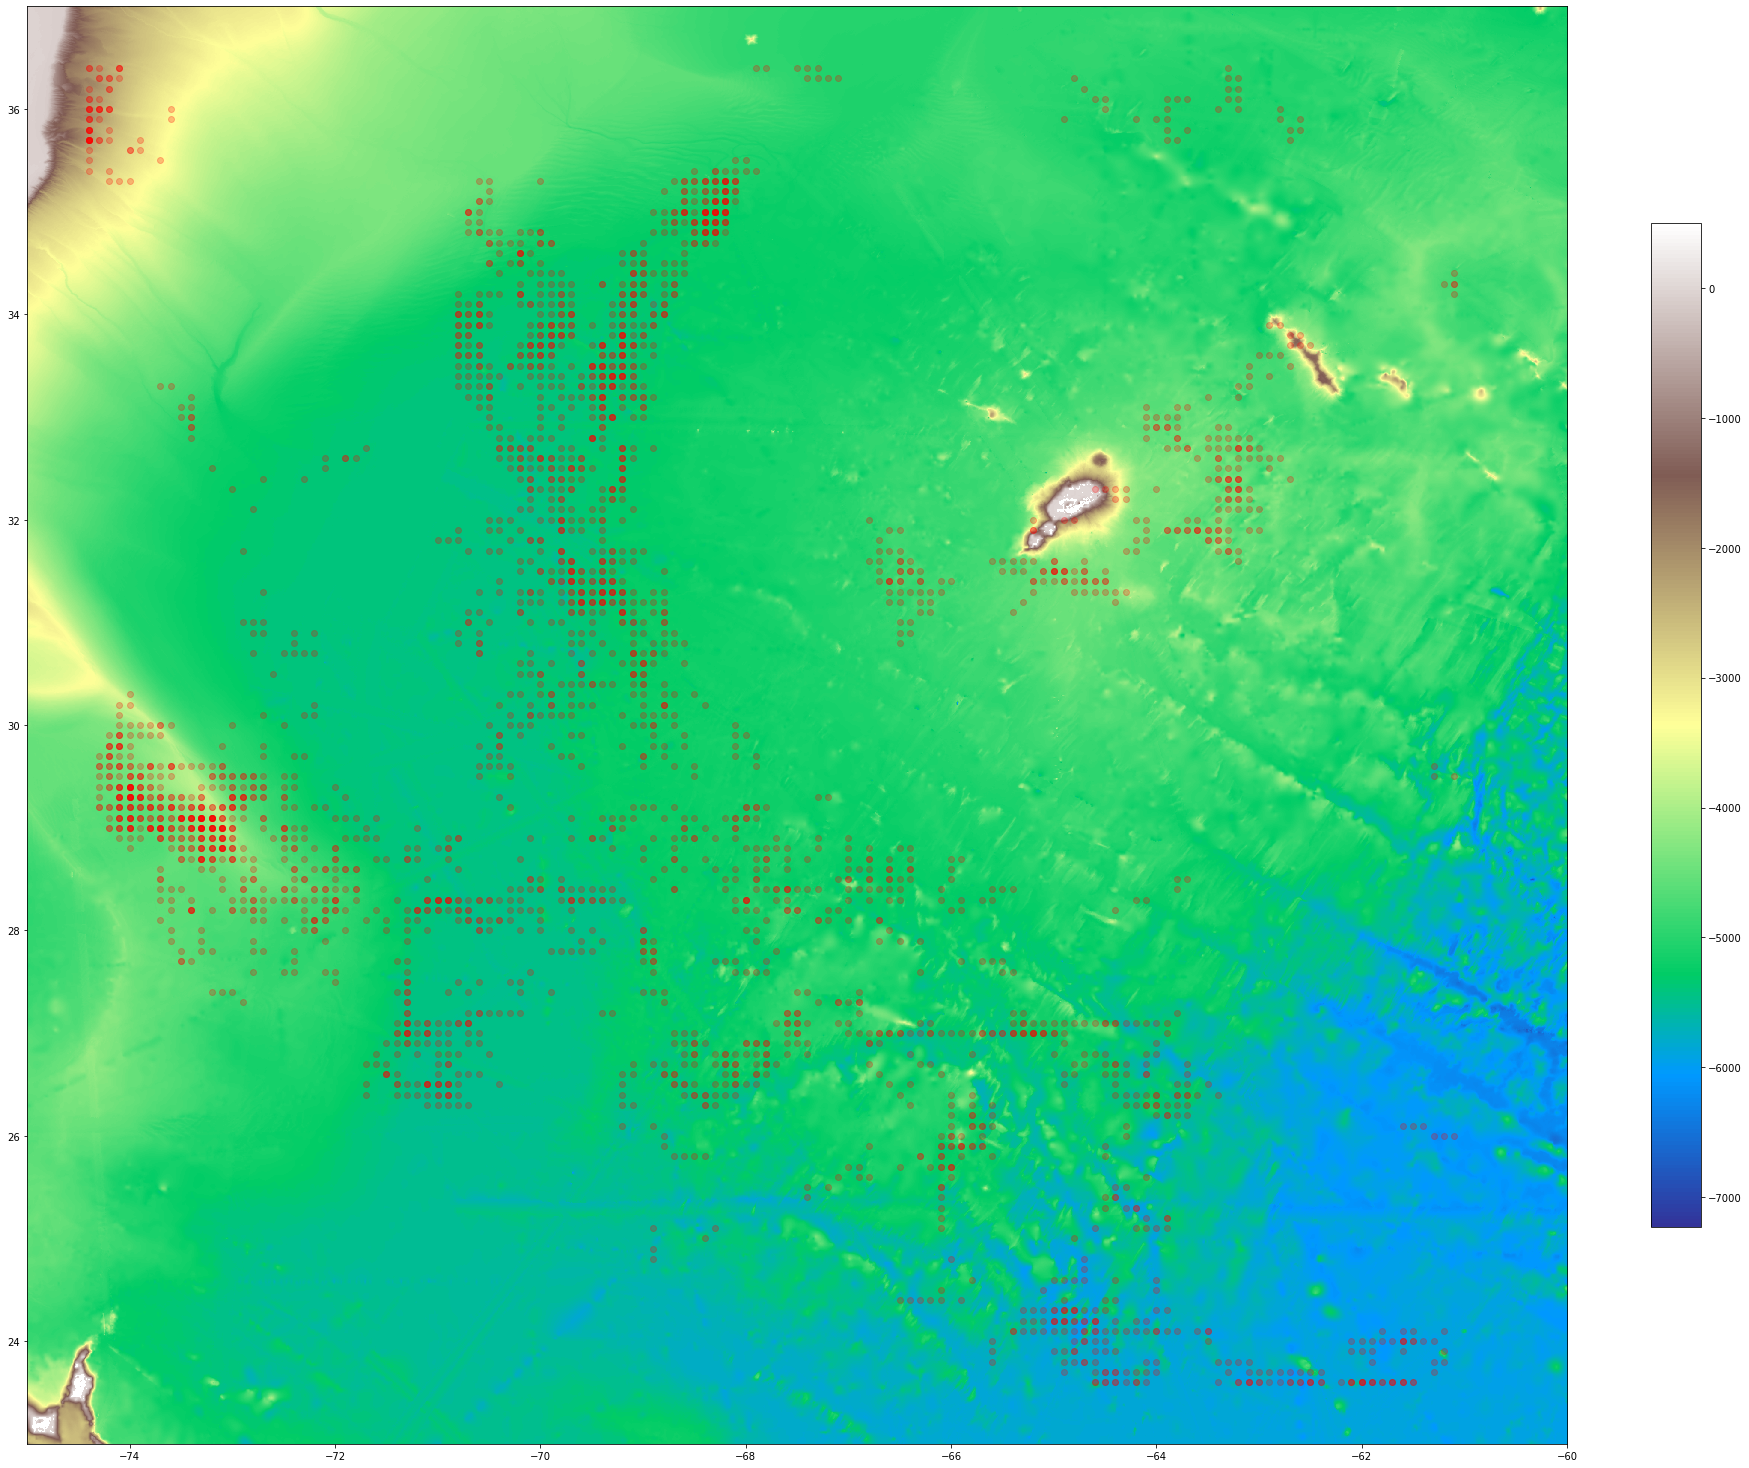

In [58]:
plt.figure(figsize=(30, 30))
plt.imshow(df, cmap="terrain", interpolation="none", extent=[-75, -60, 23, 37])
vessels_overlay = vessels_df.copy()
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat > 23.5]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat < 36.5]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon < -61]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon > -74.5]

plt.colorbar(fraction=0.03)
plt.scatter(vessels_overlay['cell_ll_lon'], vessels_overlay['cell_ll_lat'], vmin=0, vmax=6, color="red", alpha=0.25)
vessels_overlay


- After overlaying, we now pull the depth data for each vessel in the area and find the average vessel depth.

In [59]:
longs = df.columns
lats = df.index
latcoords = lats.get_indexer(vessels_overlay['cell_ll_lat'],method='nearest')
longcoords = longs.get_indexer(vessels_overlay['cell_ll_lon'],method='nearest')
depths_overlay = []
for i in range(len(latcoords)):
    depths_overlay.append(df.iloc[latcoords[i],longcoords[i]])
vessels_overlay['Depth']=depths_overlay
vessels_overlay['Depth'].sum()/vessels_overlay.shape[0] #average ship depth 

-5092.4099271086425

- Now to find the total average depth.

In [60]:
df.mean().mean() #average depth

-5057.967105881341

Text(0.5, 0, 'Depth (meters)')

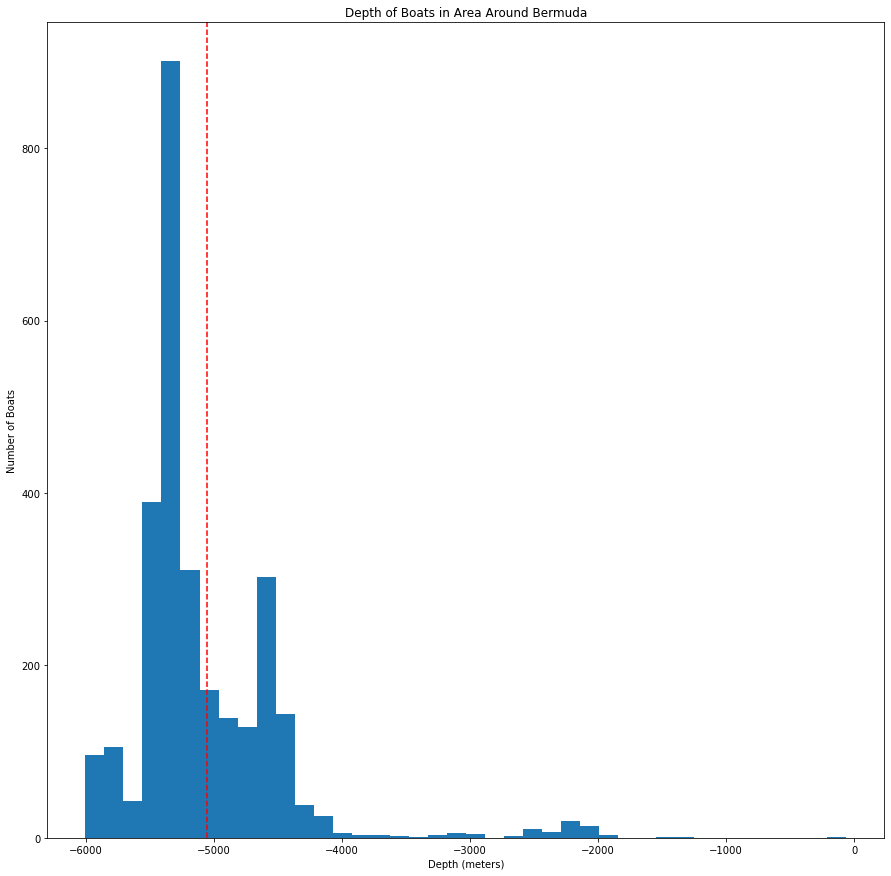

In [61]:

plt.figure(figsize=(15, 15))
plt.hist(vessels_overlay.Depth,bins=40)
plt.axvline(df.mean().mean(), color='Red', linestyle='--')
plt.title("Depth of Boats in Area Around Bermuda")
plt.ylabel("Number of Boats")
plt.xlabel("Depth (meters)")

Text(0, 0.5, 'Depth (meters)')

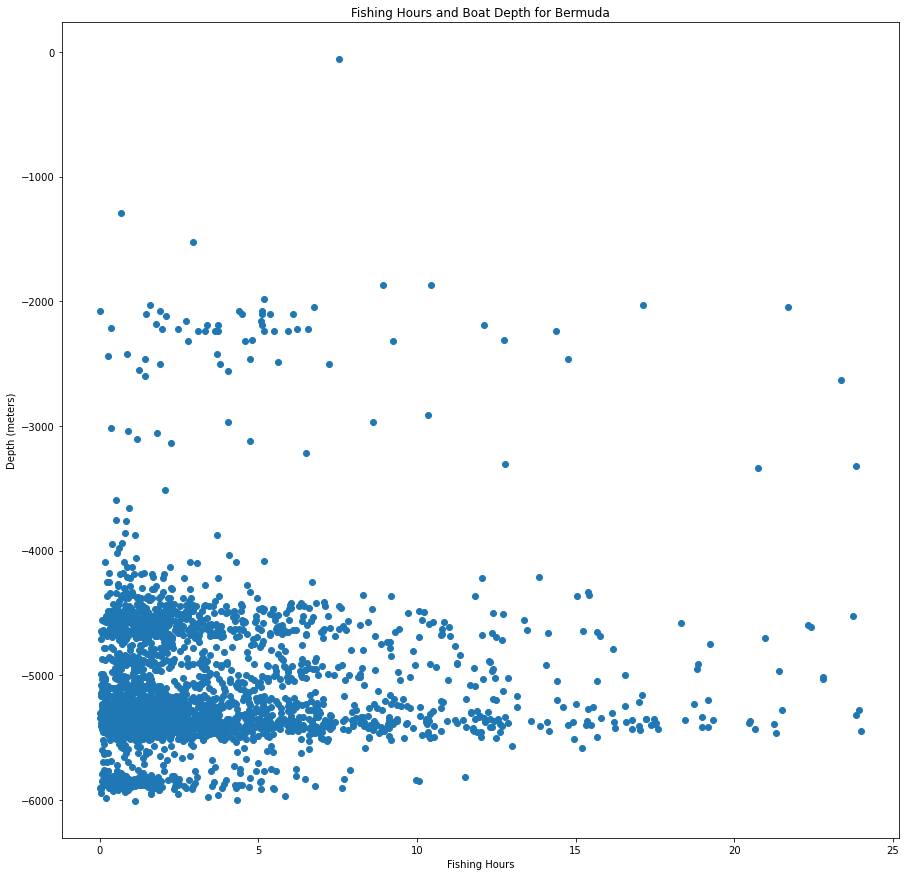

In [62]:
# The graph shows that there is no correlation,
# but does show that there are spikes at certain depths
plt.figure(figsize=(15, 15))
plt.scatter(x=vessels_overlay.fishing_hours,y=vessels_overlay.Depth)
plt.title("Fishing Hours and Boat Depth for Bermuda")
plt.xlabel("Fishing Hours")
plt.ylabel("Depth (meters)")

In [63]:
longs = depth_df.columns
lats = depth_df.index

vessels = vessels_df.copy()
vessels = vessels[vessels.cell_ll_lat > 24]
vessels = vessels[vessels.cell_ll_lat < 49.5]
vessels = vessels[vessels.cell_ll_lon < -61]
vessels = vessels[vessels.cell_ll_lon > -99]

latcoords = lats.get_indexer(vessels['cell_ll_lat'],method='nearest')
longcoords = longs.get_indexer(vessels['cell_ll_lon'],method='nearest')
depths_overlay = []
for i in range(len(latcoords)):
    depths_overlay.append(depth_df.iloc[latcoords[i],longcoords[i]])
vessels['Depth']=depths_overlay
vessels = vessels[vessels.Depth < 0]
vessels['Depth'].sum()/vessels.shape[0] #average ship depth for east coast


-145.53785647027172

Text(0, 0.5, 'Depth (meters)')

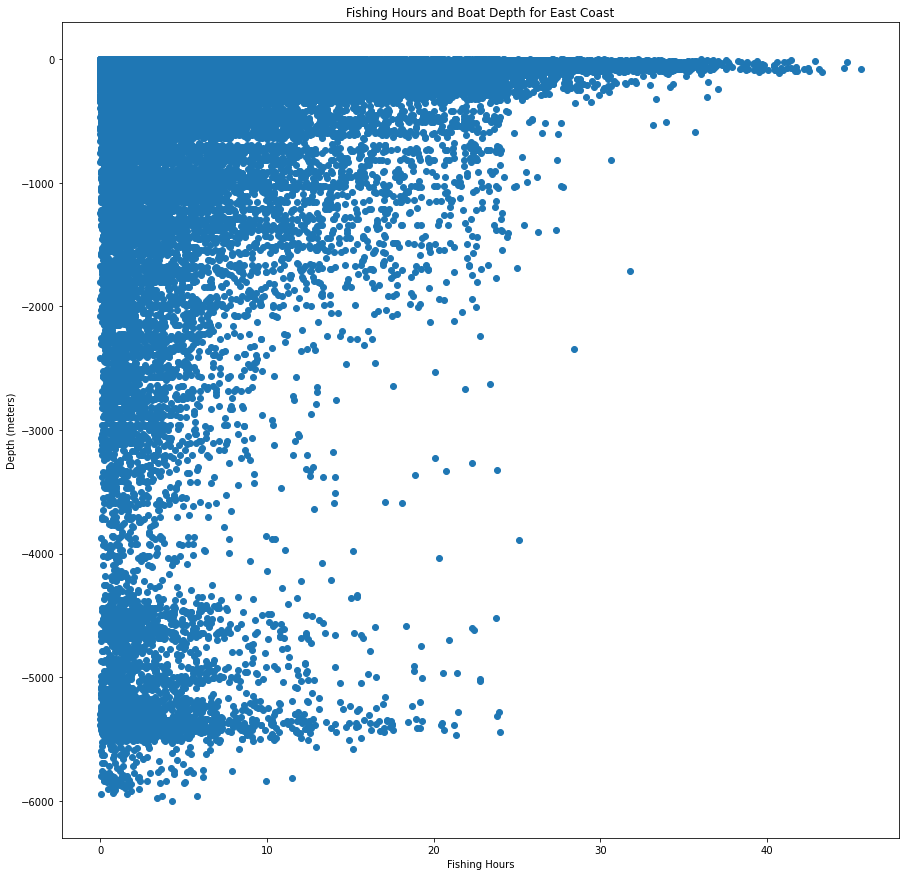

In [64]:
# The graph shows that there is no correlation,
# but does show that there are spikes at certain depths
plt.figure(figsize=(15, 15))
plt.scatter(x=vessels.fishing_hours,y=vessels.Depth)
plt.title("Fishing Hours and Boat Depth for East Coast")
plt.xlabel("Fishing Hours")
plt.ylabel("Depth (meters)")

- On the East coast scale, the trend continues with boats congregating around -5500 meters and other drop offs like -4500 meters.
- Now we will analyze how the time of year affects fishing boat location

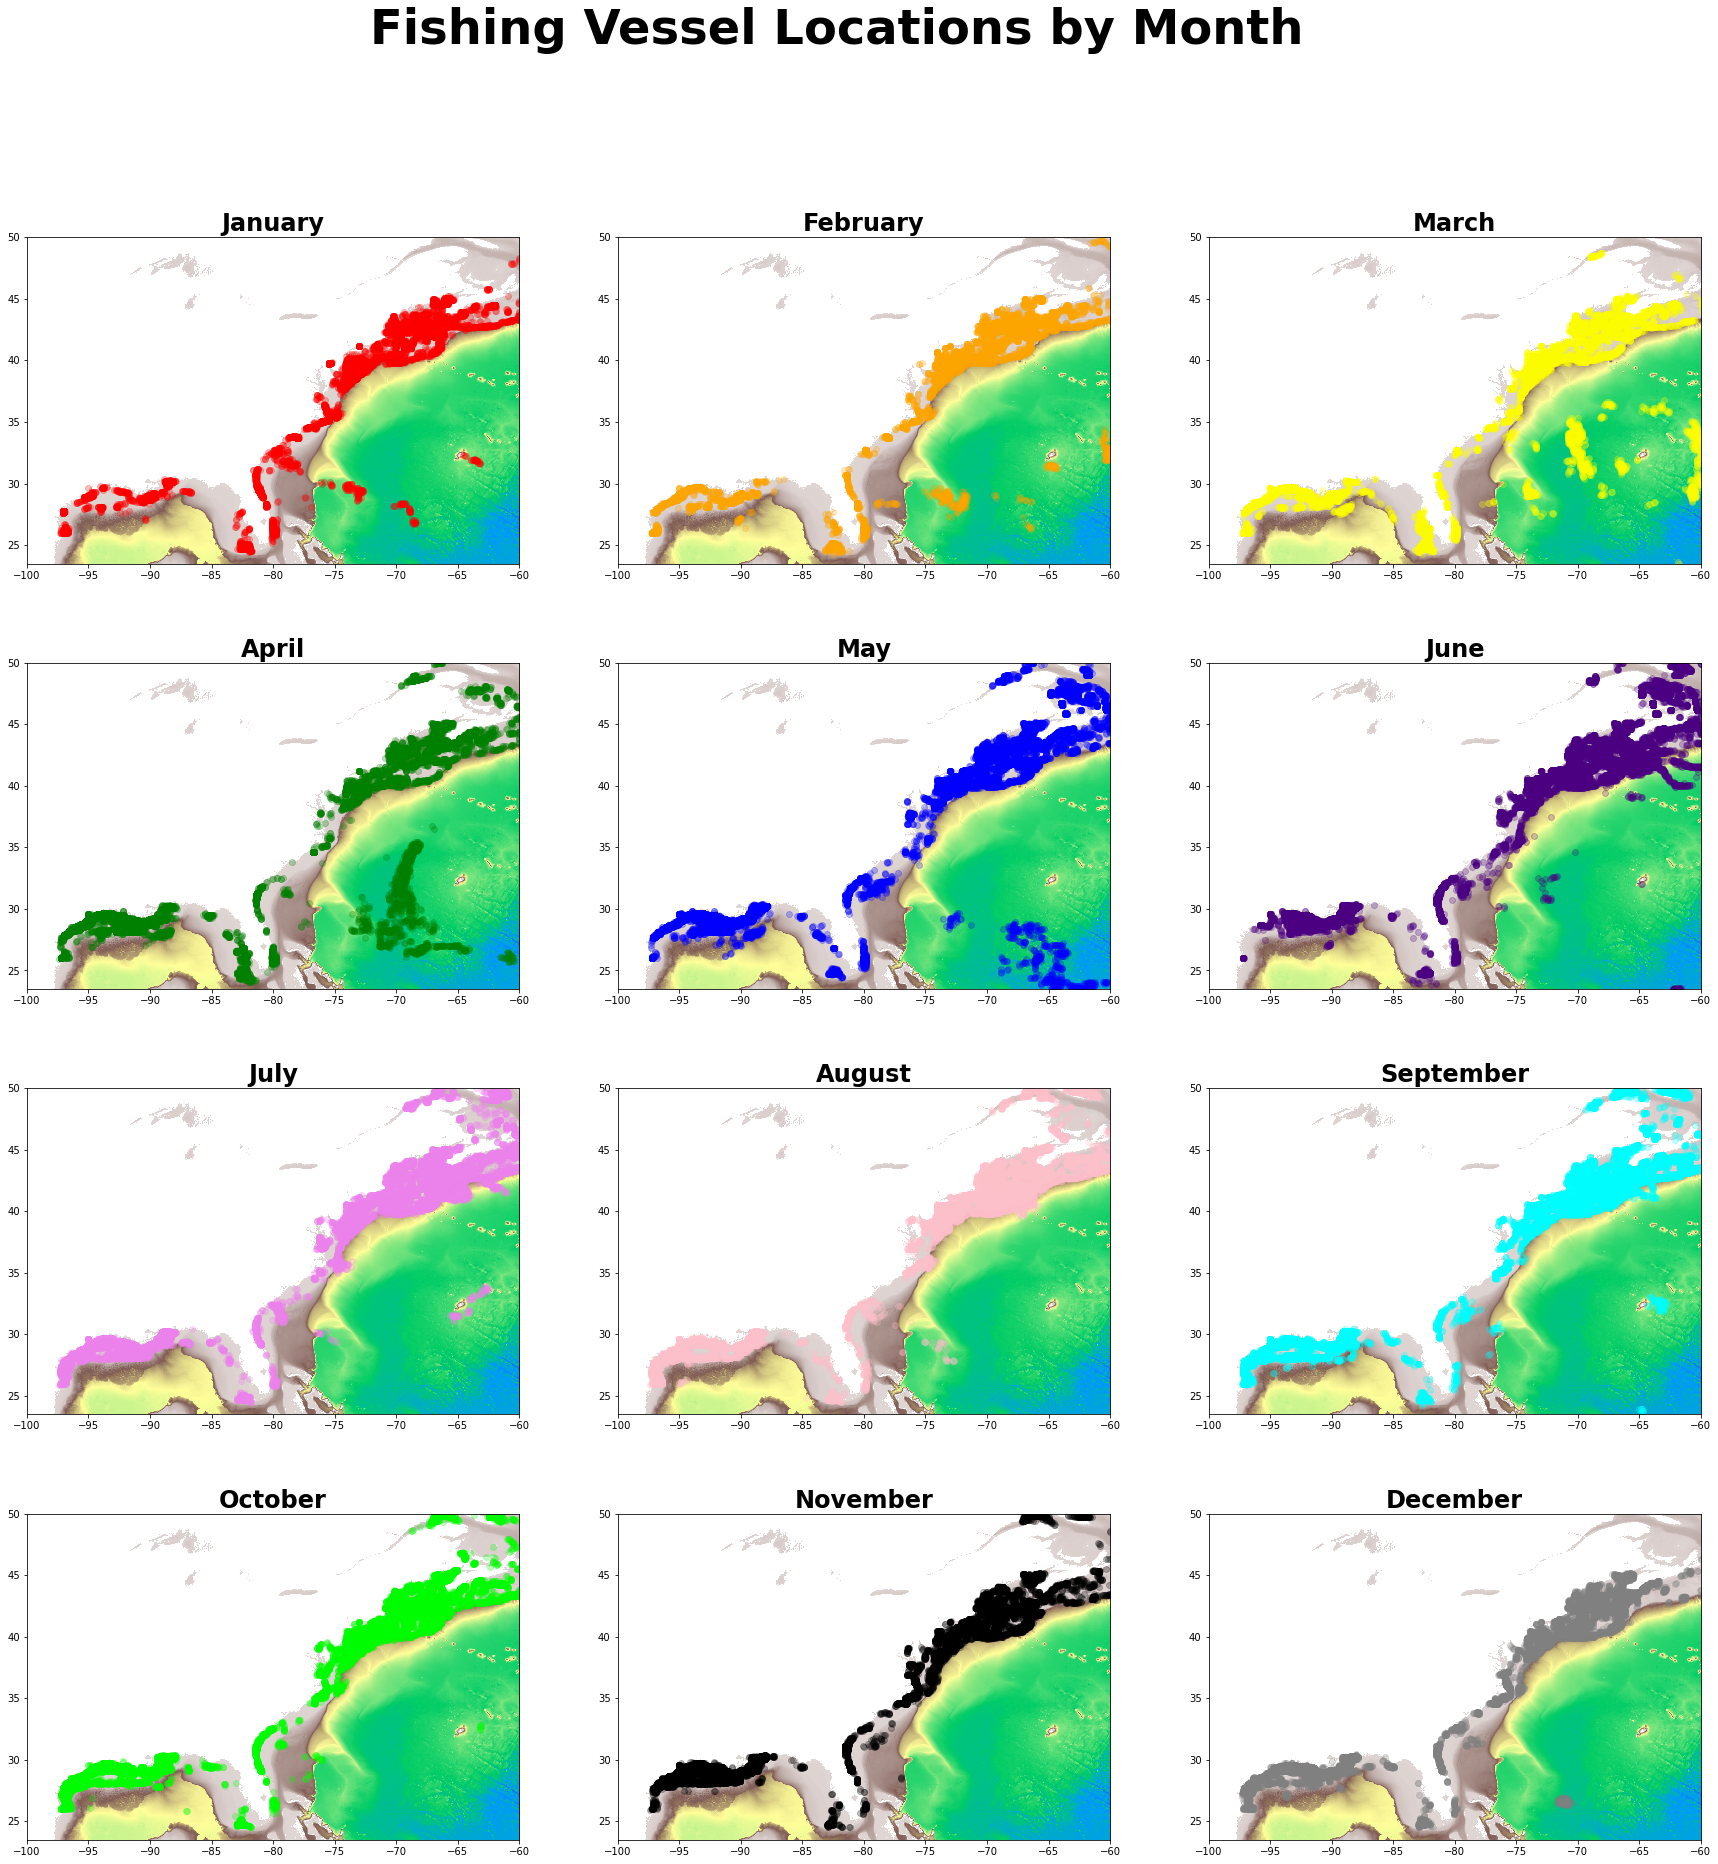

In [65]:
vessels_by_month = vessels_df.copy()
vessels_by_month['date'] = pd.to_datetime(vessels_df['date'])

vessels_jan = vessels_by_month[vessels_by_month['date'].dt.month == 1]
vessels_feb = vessels_by_month[vessels_by_month['date'].dt.month == 2]
vessels_mar = vessels_by_month[vessels_by_month['date'].dt.month == 3]
vessels_apr = vessels_by_month[vessels_by_month['date'].dt.month == 4]
vessels_may = vessels_by_month[vessels_by_month['date'].dt.month == 5]
vessels_jun = vessels_by_month[vessels_by_month['date'].dt.month == 6]
vessels_jul = vessels_by_month[vessels_by_month['date'].dt.month == 7]
vessels_aug = vessels_by_month[vessels_by_month['date'].dt.month == 8]
vessels_sep = vessels_by_month[vessels_by_month['date'].dt.month == 9]
vessels_oct = vessels_by_month[vessels_by_month['date'].dt.month == 10]
vessels_nov = vessels_by_month[vessels_by_month['date'].dt.month == 11]
vessels_dec = vessels_by_month[vessels_by_month['date'].dt.month == 12]

fig, axes = plt.subplots(4, 3)
fig.set_figheight(30)
fig.set_figwidth(30)
fig.suptitle("Fishing Vessel Locations by Month", fontsize=48, fontweight='bold')
axes[0, 0].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[0, 0].scatter(vessels_jan['cell_ll_lon'], vessels_jan['cell_ll_lat'], vmin=0, vmax=1, color="red", alpha=0.25)
axes[0, 0].set_title("January", fontsize=24, fontweight='bold')
axes[0, 1].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[0, 1].scatter(vessels_feb['cell_ll_lon'], vessels_feb['cell_ll_lat'], vmin=0, vmax=1, color="orange", alpha=0.25)
axes[0, 1].set_title("February", fontsize=24, fontweight='bold')
axes[0, 2].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[0, 2].scatter(vessels_mar['cell_ll_lon'], vessels_mar['cell_ll_lat'], vmin=0, vmax=1, color="yellow", alpha=0.25)
axes[0, 2].set_title("March", fontsize=24, fontweight='bold')
axes[1, 0].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[1, 0].scatter(vessels_apr['cell_ll_lon'], vessels_apr['cell_ll_lat'], vmin=0, vmax=1, color="green", alpha=0.25)
axes[1, 0].set_title("April", fontsize=24, fontweight='bold')
axes[1, 1].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[1, 1].scatter(vessels_may['cell_ll_lon'], vessels_may['cell_ll_lat'], vmin=0, vmax=1, color="blue", alpha=0.25)
axes[1, 1].set_title("May", fontsize=24, fontweight='bold')
axes[1, 2].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[1, 2].scatter(vessels_jun['cell_ll_lon'], vessels_jun['cell_ll_lat'], vmin=0, vmax=1, color="indigo", alpha=0.25)
axes[1, 2].set_title("June", fontsize=24, fontweight='bold')
axes[2, 0].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[2, 0].scatter(vessels_jul['cell_ll_lon'], vessels_jul['cell_ll_lat'], vmin=0, vmax=1, color="violet", alpha=0.25)
axes[2, 0].set_title("July", fontsize=24, fontweight='bold')
axes[2, 1].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[2, 1].scatter(vessels_aug['cell_ll_lon'], vessels_aug['cell_ll_lat'], vmin=0, vmax=1, color="pink", alpha=0.25)
axes[2, 1].set_title("August", fontsize=24, fontweight='bold')
axes[2, 2].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[2, 2].scatter(vessels_sep['cell_ll_lon'], vessels_sep['cell_ll_lat'], vmin=0, vmax=1, color="cyan", alpha=0.25)
axes[2, 2].set_title("September", fontsize=24, fontweight='bold')
axes[3, 0].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[3, 0].scatter(vessels_oct['cell_ll_lon'], vessels_oct['cell_ll_lat'], vmin=0, vmax=1, color="lime", alpha=0.25)
axes[3, 0].set_title("October", fontsize=24, fontweight='bold')
axes[3, 1].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[3, 1].scatter(vessels_nov['cell_ll_lon'], vessels_nov['cell_ll_lat'], vmin=0, vmax=1, color="black", alpha=0.25)
axes[3, 1].set_title("November", fontsize=24, fontweight='bold')
axes[3, 2].imshow(depth_df, cmap="terrain", interpolation="none", extent=[-100, -60, 23.5, 50])
axes[3, 2].scatter(vessels_dec['cell_ll_lon'], vessels_dec['cell_ll_lat'], vmin=0, vmax=1, color="gray", alpha=0.25)
axes[3, 2].set_title("December", fontsize=24, fontweight='bold')

plt.show()

- Each month shows that boats cling to the shore and congregrate around the green to blue drop off (-5500 meters) and the brown to yellow drop off (-2500 meters).

The next two cells show graphs relating the fishing hours to the time of the year.
The first cell contains two graphs based on the entire US East Coast. The first graph shows the distribution of fishing hours based on Months, and the second graph is an interactive visualization allowing the user to look at the distribution of fishing hours based on each day.

The second cell contains two graphs based on only the Bermuda region. The first graph shows the distribution of fishing hours based on Months, and the second graph is an interactive visualization allowing the user to look at the distribution of fishing hours based on each day.

It is important to note that the graphs in the first cell have peaks in July and October as that coincides with the warm season corresponding to more people fishing and the tuna season respectively. However, the graphs in the second cell only have peaks during October through January since the Bermuda region is the hotspot for tuna fishing.

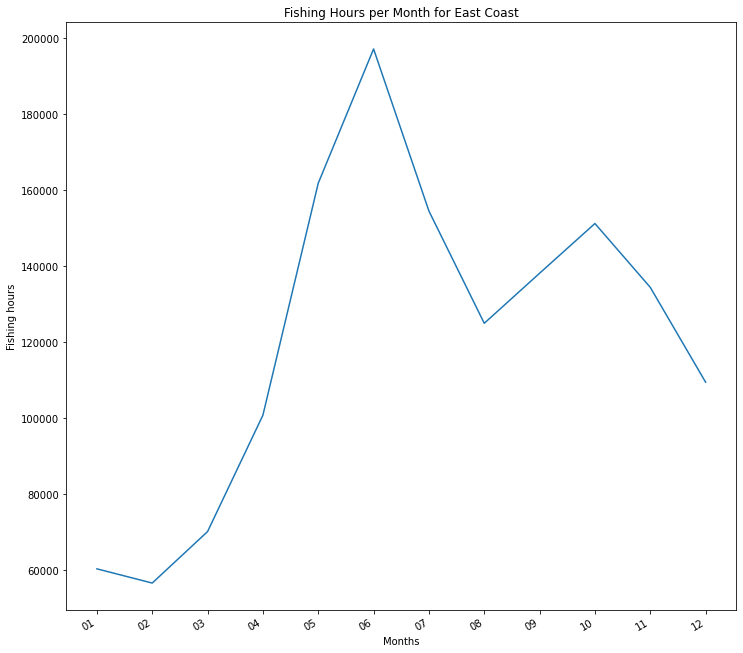

In [66]:
vessels_copy = vessels_df.copy()
vessels_copy.date = pd.to_datetime(vessels_copy['date'], format="%Y-%m-%d")
time = vessels_copy.groupby(vessels_copy['date'].dt.strftime('%m'))['fishing_hours'].sum().sort_index()
time_df = time.to_frame().reset_index()
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(time_df.date, time_df.fishing_hours)
plt.gcf().autofmt_xdate()
plt.xlabel("Months")
plt.ylabel("Fishing hours")
plt.title("Fishing Hours per Month for East Coast")
plt.show()

time = vessels_copy.groupby(vessels_copy['date'])['fishing_hours'].sum().sort_index()
time_df = time.to_frame().reset_index()
time_df = time_df.rename(columns = {"date": "Months", "fishing_hours": "Fishing Hours"})
axes1 = px.line(time_df, x = "Months", y = "Fishing Hours",title="Interactive Fishing Hours per Month for East Coast")
axes1.show() 

vessels_copy = vessels.copy()
time = vessels_copy.groupby(vessels_copy['date'])['Depth'].mean().sort_index()
time_df = time.to_frame().reset_index()
time_df = time_df.rename(columns = {"date": "Months", "Depth": "Average Depth (Meters)"})
axes1 = px.line(time_df, x = "Months", y = "Average Depth (Meters)",title="Interactive Average Depth per Month for East Coast")
axes1.show() 


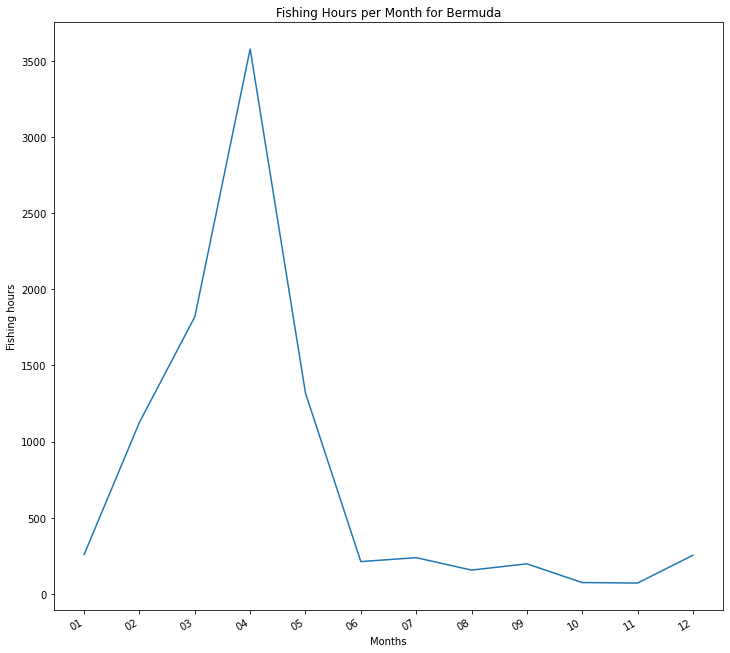

In [67]:

vessels_copy = vessels_overlay.copy()
vessels_copy.date = pd.to_datetime(vessels_copy['date'], format="%Y-%m-%d")
time = vessels_copy.groupby(vessels_copy['date'].dt.strftime('%m'))['fishing_hours'].sum().sort_index()
time_df = time.to_frame().reset_index()
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(time_df.date, time_df.fishing_hours)
plt.gcf().autofmt_xdate()
plt.xlabel("Months")
plt.ylabel("Fishing hours")
plt.title("Fishing Hours per Month for Bermuda")
plt.show()

time = vessels_copy.groupby(vessels_copy['date'])['fishing_hours'].sum().sort_index()
time_df = time.to_frame().reset_index()
time_df = time_df.rename(columns = {"date": "Months", "fishing_hours": "Fishing Hours"})
axes1 = px.line(time_df, x = "Months", y = "Fishing Hours",title="Interactive Fishing Hours per Month for Bermuda")
axes1.show() 

vessels_copy = vessels_overlay.copy()
time = vessels_copy.groupby(vessels_copy['date'])['Depth'].mean().sort_index()
time_df = time.to_frame().reset_index()
time_df = time_df.rename(columns = {"date": "Months", "Depth": "Average Depth (Meters)"})
axes1 = px.line(time_df, x = "Months", y = "Average Depth (Meters)",title="Interactive Average Depth per Month for Bermuda")
axes1.show() 

## Conclusion

- With our new analysis we found that there was a correlation between the depth data and where the vessels are located. It was found that the number of boats significantly decreased in some depths around Bermuda (this was shown in the "Depth of Boats in Area around Bermuda" histogram). Some of these depths include ~5200, ~3500, and ~2400 feet. If there was no correlation by these drop offs, they were found in shallower depths (i.e. < 1000 feet deep). We tried to extend this correlation to potentially predict depth by looking at fishing hours. As said previously, it was found that with the already existing correlation between the number of boat drop offs and the depth, there was also a correlation between the number of hours spent fishing and the drop offs. The number of hours increased as we neared those drop offs causing there to be an inverse relationship between the two. We then sought to find "good" and "bad" fishing spots to optimize the time spent and the number of fish caught. We discovered that a depth that is under 4000 feet is a suboptimal range to fish in, however the best fishing spots are around 5200 feet. Finally, we looked into was how the time affects where most fishing vessels are and what we found was that each month shows that boats cling to the shore and congregrate around the green to blue drop off (-5500 meters) and the brown to yellow drop off (-2500 meters). The Spring months correlated better with the green to blue drop off where as the Fall and Winter months correlated better with the brown to yellow drop off. 

- Caveats:
    - Issues in initial communication caused merge conflicts early on.
    - Limitations in the dataset prevented us from reaching ideal conclusions, with a better dataset (which would ultimately lead to more conclusive results) could be found and used in finding more accurate answers to some of the questions posed above.

- Future Work:
    - If we continue to work on this we could find new correlations and answer more in depth questions as we keep iterating through and adding/merging new data. These questions can include, fish migration patterns per month, types of fish in various depths, and expanding our current analysis to a global scale rather than limiting it to the east coast. 
    - Can be applied to commercial fisherman to aid them in knowing when and where to fish and at what depths.
    - Can aid research in locating various types of fish allowing us to gain accurate information on environmental quality and integrity.  
    - Comparing the fishing hour data with the water temperature and identifying a correlation.
    - Tracking a boat and mapping its path across a year.
    - Talk to the locals and figure out why there is a high congregation of boats in April.

- Open Questions:
    - Based on the "Fishing Hours per Month for East Coast" graph, what is the reason for the peaks in the months of June and October? 
    - What is the reason for the congregation for fishing boats between Bermuda and the East Coast in the months of March and April?